In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

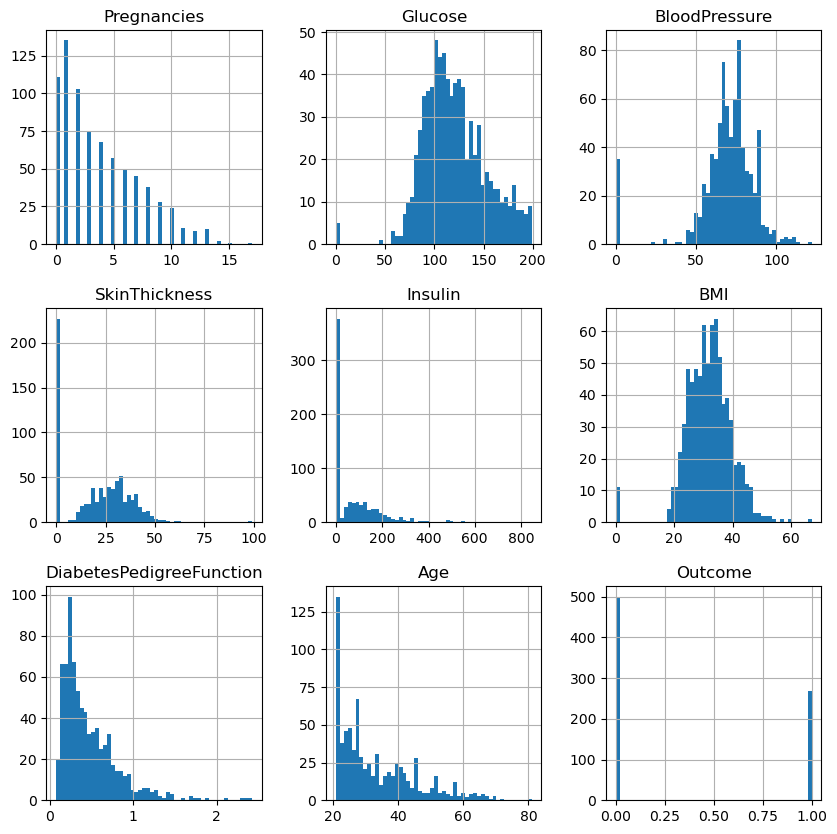

In [4]:
df.hist(bins=50,figsize=(10,10))

In [6]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [5]:
scaler = StandardScaler()

In [8]:
X = scaler.fit_transform(X)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [10]:
rfc = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=2)

In [11]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=2)

In [13]:
y_pred = rfc.predict(X_test)

In [16]:
test_accuracy = rfc.score(X_test,y_test)
test_accuracy

0.7922077922077922

In [18]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.7922077922077922
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       146
           1       0.78      0.61      0.68        85

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231

